## Importing Libraries

In [33]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# reading the csv file
diab_df = pd.read_csv("diabetes.csv")
# first five rows of the dataframe
diab_df.head()
# shape of the dataframe
diab_df.shape

(10000, 21)

## Automated EDA

In [3]:
# profile = ProfileReport(diab_df, title="diabetes dataset profile", explorative=True)
# profile.to_file("index.html")

In [4]:
# Drop UnNamed Col
diab_df.columns
diab_df.drop('Unnamed: 0', axis="columns", inplace=True)



In [5]:
diab_df.head()

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


## Trying the Anova F-Value Stats to determine the most relevant columns

## 

In [6]:
# check and possibly fill na for alcohol consumption
diab_df["Alcohol_Consumption"].value_counts()
diab_df["Alcohol_Consumption"]
diab_df.isna().sum()
# dropping null values and creating a new dataframe 
diab_df_not_null = diab_df.dropna()
diab_df_not_null.shape

(6680, 20)

In [7]:
# encode sex, ethnicity, physical activity level, alcohol consumption, smoking status, and try f_regression
# dictionaries
sex_map = {"Female": 0, "Male": 1}
eth_map = {"Black": 0, "White": 1, "Hispanic": 2, "Asian": 3}
phys_map = {"Low": 0, "Moderate": 1, "High": 2}
alc_map = {"Moderate": 0, "Heavy": 1}
smoke_map = {"Never": 0, "Former": 1, "Current": 2}


# mapping
diab_df_not_null["Sex"] = diab_df_not_null["Sex"].map(sex_map)
diab_df_not_null["Ethnicity"] = diab_df_not_null["Ethnicity"].map(eth_map)
diab_df_not_null["Physical_Activity_Level"] = diab_df_not_null["Physical_Activity_Level"].map(phys_map)
diab_df_not_null["Alcohol_Consumption"] = diab_df_not_null["Alcohol_Consumption"].map(alc_map)
diab_df_not_null["Smoking_Status"] = diab_df_not_null["Smoking_Status"].map(smoke_map)

diab_df_not_null

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,0,1,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,1,1538,0,0,0,1
1,48,1,3,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,1,2653,0,2,0,1
2,34,0,0,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,0,1684,1,1,1,0
3,62,1,3,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,0,3796,0,0,1,0
4,27,0,3,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,1,3161,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,44,1,3,28.2,70.7,137.4,4.0,176,65,262.4,63.3,97.4,60.8,4.6,2,3211,0,0,1,0
9994,51,1,2,26.7,104.1,166.5,12.8,156,95,293.1,47.6,95.3,70.7,4.3,1,2517,1,1,1,0
9997,50,0,3,29.0,106.3,97.5,4.9,122,61,266.0,69.8,156.1,85.8,4.9,2,3175,1,1,1,1
9998,62,0,1,27.3,119.9,89.0,11.5,99,115,172.3,74.2,110.9,25.3,5.2,2,3478,0,0,1,0


In [8]:
# Anova F Value
Xp = diab_df_not_null[diab_df_not_null.columns[:-1]]
yp = diab_df_not_null[diab_df_not_null.columns[-1]]


selector = SelectKBest(
    score_func=f_classif, k=10
)

X_selected = selector.fit_transform(Xp, yp)

# Get selected feature names
selected_features_mask = selector.get_support()
selected_feature_names = Xp.columns[selected_features_mask]

print("\nSelected features (chi2):", selected_feature_names.tolist())
print("Selected features shape:", X_selected.shape)


Selected features (chi2): ['Sex', 'Ethnicity', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_HDL', 'Cholesterol_LDL', 'Serum_Urate', 'Smoking_Status']
Selected features shape: (6680, 10)


## Without the Anova F-Value

In [9]:
# dropping null values from the original dataframe
diab_df.dropna(inplace=True)
diab_df.isna().sum()
# diabetes column as category
diab_df["Previous_Gestational_Diabetes"] = diab_df["Previous_Gestational_Diabetes"].astype("category", copy=False)

In [10]:
# getting info about the dataframe and its columns
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6680 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            6680 non-null   int64   
 1   Sex                            6680 non-null   object  
 2   Ethnicity                      6680 non-null   object  
 3   BMI                            6680 non-null   float64 
 4   Waist_Circumference            6680 non-null   float64 
 5   Fasting_Blood_Glucose          6680 non-null   float64 
 6   HbA1c                          6680 non-null   float64 
 7   Blood_Pressure_Systolic        6680 non-null   int64   
 8   Blood_Pressure_Diastolic       6680 non-null   int64   
 9   Cholesterol_Total              6680 non-null   float64 
 10  Cholesterol_HDL                6680 non-null   float64 
 11  Cholesterol_LDL                6680 non-null   float64 
 12  GGT                            6680 non

In [11]:
# Feature and target variables
X = diab_df[diab_df.columns[:-1]]
y = diab_df[diab_df.columns[-1]]

# selecting numerical and categorical columns
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns


# splitting training and testing data
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# using ColumnTransformer for scaling numerical features and one hot encoding of categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


# Creating pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000))
])


In [13]:
# fitting the training data into the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose', 'HbA1c',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL', 'GGT',
       'Serum_Urate', 'Dietary_Intake_Calories', 'Family_History_of_Diabetes'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption',
       'Smoking_Status'],
      dtype='object'))])),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

In [14]:
# Making train predictions
y_train_pred = pipeline.predict(X_train)

# Evaluate the model
print("Model Evaluation")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

Model Evaluation
Accuracy: 0.5266

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.35      0.42      2606
           1       0.53      0.69      0.60      2738

    accuracy                           0.53      5344
   macro avg       0.53      0.52      0.51      5344
weighted avg       0.53      0.53      0.51      5344


Confusion Matrix:
 [[ 916 1690]
 [ 840 1898]]


In [15]:
# Making test predictions
y_pred = pipeline.predict(X_test)

# Evaluating the Logistic Regression model
print("Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Evaluation
Accuracy: 0.5382

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.32      0.39       632
           1       0.55      0.74      0.63       704

    accuracy                           0.54      1336
   macro avg       0.53      0.53      0.51      1336
weighted avg       0.53      0.54      0.52      1336


Confusion Matrix:
 [[201 431]
 [186 518]]


## With Anova F- selected Features

In [16]:
# New feature variables
Xn = diab_df[selected_feature_names]
yn = diab_df[diab_df.columns[-1]]

# selecting numerical and categorical columns
numerical_features_n = Xn.select_dtypes(include=np.number).columns
categorical_features_n = Xn.select_dtypes(include='object').columns


# Splitting the data again
Xn_train, Xn_test, yn_train , yn_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# using ColumnTransformer for scaling numerical features and one hot encoding of categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_n),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_n)
    ])


# Creating pipeline
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(random_state=42, solver='lbfgs'))
])

In [18]:
# Train the pipeline
pipeline_lr.fit(Xn_train, yn_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Waist_Circumference', 'Fasting_Blood_Glucose',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Cholesterol_HDL', 'Cholesterol_LDL', 'Serum_Urate'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Sex', 'Ethnicity', 'Smoking_Status'], dtype='object'))])),
                ('logreg', LogisticRegression(random_state=42))])

In [19]:
# Make train predictions
y_train_pred_n = pipeline_lr.predict(Xn_train)

# Evaluating the Logistic Regression model
print("Model Evaluation")
print(f"Accuracy: {accuracy_score(yn_train, y_train_pred_n):.4f}")
print("\nClassification Report:\n", classification_report(yn_train, y_train_pred_n))
print("\nConfusion Matrix:\n", confusion_matrix(yn_train, y_train_pred_n))

Model Evaluation
Accuracy: 0.5281

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.34      0.41      2606
           1       0.53      0.71      0.61      2738

    accuracy                           0.53      5344
   macro avg       0.53      0.52      0.51      5344
weighted avg       0.53      0.53      0.51      5344


Confusion Matrix:
 [[ 890 1716]
 [ 806 1932]]


In [20]:
# cross validation score logistic regression
lr_cv = cross_val_score(pipeline_lr, X, y, cv=10, scoring="accuracy")
# Average scores
lr_cv.mean()

0.5211077844311378

## Trying out other models with the original split data (Not Anova Features)


In [21]:
# random forest model
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [22]:
# cross validation score random forest
rf_cv = cross_val_score(pipeline_rf, X, y, cv=10, scoring="accuracy")
# Average scores
rf_cv.mean()

0.5088323353293414

In [23]:
# decision tree model
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [24]:
# cross validation score decision tree
dc_cv = cross_val_score(pipeline_rf, X, y, cv=10, scoring="accuracy")
# Average scores
dc_cv.mean()

0.49985029940119763

In [25]:
# knn model
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [26]:
# cross validation score decision tree
knn_cv = cross_val_score(pipeline_knn, X, y, cv=10, scoring="accuracy")
# Average scores
knn_cv.mean()

0.49461077844311385

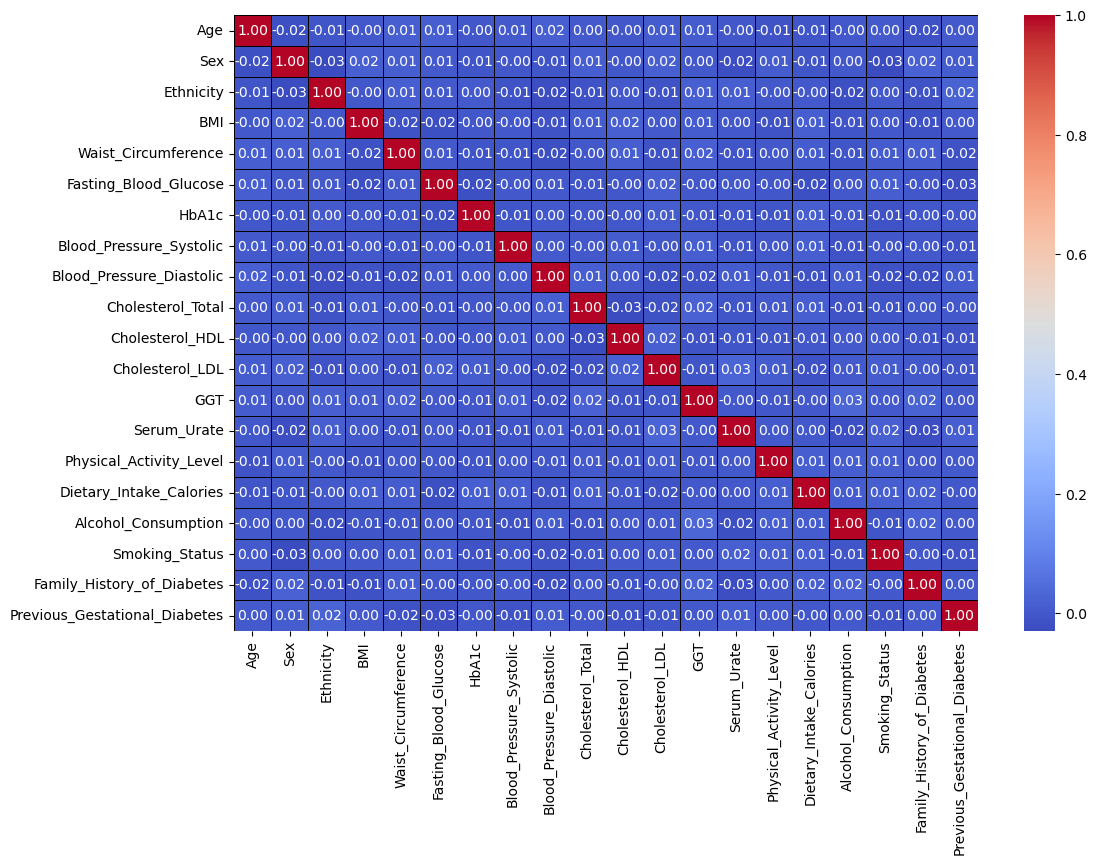

In [34]:
# the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(diab_df_not_null.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black');